# Task 1 - Iris Flower Classification

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

## Load necessary liabraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading The Dataset

In [ ]:
# Reading csv file
df = pd.read_csv("/content/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Dropping Unwanted Column

In [ ]:
# Dropping Id columns
df = df.drop(["Id"],axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Analyzing The Dataset

In [ ]:
# Getting info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Counting the value of Species column
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
# For getting the shape
df.shape

(150, 5)

In [ ]:
# Checking for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Visualizing The Dataset

In [ ]:
count =  df.Species.value_counts()
label = df.Species.unique().tolist()

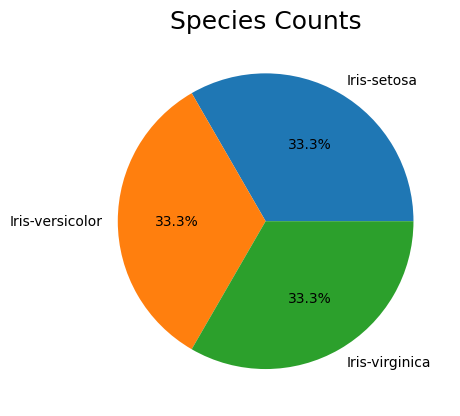

In [ ]:
# Pie Chart
plt.pie(count, labels=label,  autopct='%1.1f%%')
plt.title("Species Counts", fontsize=18)
plt.show()

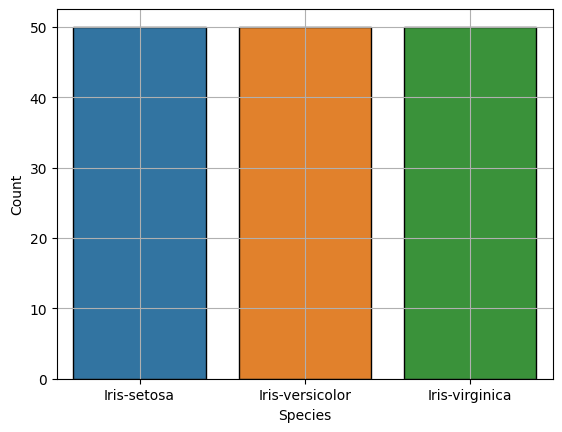

In [ ]:
# Countplot
sns.countplot(data=df, x='Species', ec='black')
plt.xlabel("Species")
plt.ylabel("Count")
plt.grid(True)
plt.show()

<ipython-input-35-8a2f53f2eae4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='coolwarm',annot=True)


<function matplotlib.pyplot.show(close=None, block=None)>

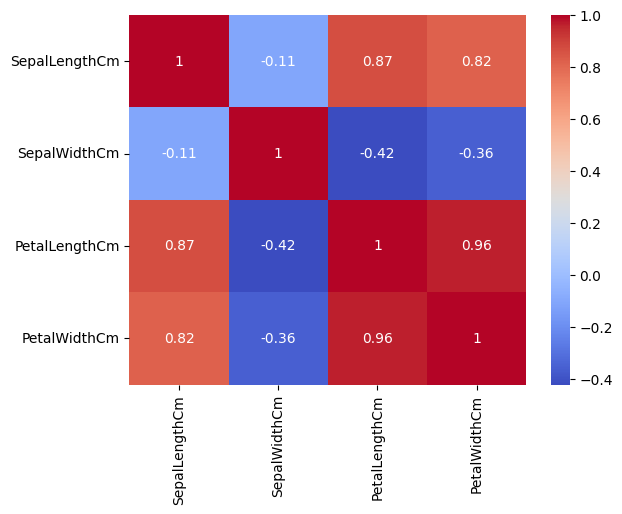

In [ ]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show

There is a high positive correlation among 'SepalLengthCm', 'PetalLengthCm' and 'PetalWidthCm'which implies if one of the dimension is high for a flower,most probobly the other two dimension will also be high.But we notice that "SepalWidthCm' is negatively correlated with other three features, so flower with low sepal width will be haing high value for other three features.

## Separating Features and Targets

x - Input variables such as independent features.

y - dependent variable which is dependent on independent variables.

In [ ]:
# separating inputs & outputs
x=df.drop(columns=['Species'])
y=df['Species']

In [ ]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


## Splitting The Data Into Train and Test Datasets

In [ ]:
# Importing train_test_split for splitting the datasets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x, y, random_state=0)

In [ ]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [ ]:
y_train

61     Iris-versicolor
92     Iris-versicolor
112     Iris-virginica
2          Iris-setosa
141     Iris-virginica
            ...       
9          Iris-setosa
103     Iris-virginica
67     Iris-versicolor
117     Iris-virginica
47         Iris-setosa
Name: Species, Length: 112, dtype: object

## Creating The Model

Logistic Regression

In [ ]:
# Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

model.fit(x_train,y_train)

LogisticRegression()

## Prediction

In [ ]:
y_pred = model.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

## Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



## Confusion Matrix

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

## Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}%".format(accuracy))

Accuracy of the model is 97.37%


## Prediction of Species

In [ ]:
x_new = np.array([[5.2,3.5,1.5,0.2],[1.9,2.2,3.8,1.1],[3.2,2.5,4.6,1.9]])
pred = model.predict(x_new)
print(f"{pred}")

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Conclusion

In this task, I took Iris Flower dataset and performed Logistic Regression Algorithm to make model.
It finally categorized flowers into species.
Got an accuracy of 97.37% and It demonstrates that the model I created is extremely accurate.
Predicted the Species using a fresh set of data and obtained an accurate result.